# Hierarchical Clustering and Asset Allocation Part 1: The Concepts
<br>__[Riskfolio documentation](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Brennan Bushee](https://www.linkedin.com/in/brennan-bushee-268273b8/)__
<br>



# 1. Downloading the data:

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2023-12-30'

# Tickers of assets
assets = ['APH', 'COST', 'FAST', 'GOOGL', 'LANC', 'LSTR', 'MIDD', 'MNST',
          'MU', 'ODFL', 'RACE', 'SSD', 'TXN', 'V', 'WAT', 'TTC', 'SPY'
         ]
mkt = ['SPY']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)

data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  17 of 17 completed


In [9]:
# Calculating returns

Y = data[assets].pct_change().dropna()
market_rate = Y.pop('SPY')
display(Y.head())
display(market_rate.head())

,APH,COST,FAST,GOOGL,LANC,LSTR,MIDD,MNST,MU,ODFL,RACE,SSD,TTC,TXN,V,WAT
Date,,,,,,,,,,,,,,,,
2016-01-05,-1.1205%,0.2445%,-1.0948%,0.2752%,2.7908%,-0.4950%,1.4763%,1.1986%,3.4194%,0.8730%,2.3212%,1.4519%,0.5534%,-1.0490%,0.7530%,-0.4143%
2016-01-06,-2.3658%,-0.9254%,0.2767%,-0.2889%,-0.2586%,-1.1835%,-5.7172%,0.1575%,-4.0486%,-2.3927%,-2.9285%,-0.7454%,-1.6924%,-0.6509%,-1.3112%,-0.0770%
2016-01-07,-3.6042%,-2.2910%,-2.0321%,-2.4140%,0.4062%,-1.5970%,-5.1302%,-0.7519%,-3.9381%,-3.8421%,-0.8923%,-2.5233%,-2.3513%,-3.2197%,-1.9663%,-0.6861%
2016-01-08,-1.4997%,-1.7504%,-0.6402%,-1.3617%,-1.8935%,0.1764%,-2.2169%,-0.6543%,-2.4158%,-0.7413%,-7.5884%,-0.9861%,-1.9206%,-2.5919%,-1.2332%,-1.6302%
2016-01-11,-0.7721%,1.7158%,0.2319%,0.2955%,0.0088%,0.1409%,-2.8393%,1.2409%,-6.0015%,-0.7286%,0.6263%,0.3113%,1.1691%,1.6878%,1.4270%,-0.5051%


Date
2016-01-05    0.1691%
2016-01-06   -1.2614%
2016-01-07   -2.3992%
2016-01-08   -1.0977%
2016-01-11    0.0990%
Name: SPY, dtype: float64

## The problem, illustrated
Traditional mean-variance optimization is a natural place to start learning about asset allocation, but the optimal portfolio often allocates almost all its weight to a handful of investable assets, and the solution to the optimization problem tends to vary greatly over time. This makes rebalancing the portfolio a lot harder and increases your capital gains tax liability.  If these assets all tend to move together, that can add a significant amount of "tail risk" and force you to take a large loss in the process.  

In [10]:
## The problem, illustrated
split_date = '2022-01-04'
# Split the DataFrame
Y_before = Y.loc[:split_date]   # Includes rows up to the split date
Y_after = Y.loc[split_date:]   # Includes rows from the split date onward

# Optionally exclude the split_date in the second part
Y_after = Y.loc[split_date:]  # If you want to keep the split date in 'after'
print("Before Split:")
print(Y_before)

print("\nAfter Split:")
print(Y_after)


Before Split:
                APH     COST     FAST    GOOGL     LANC     LSTR     MIDD  \
Date                                                                        
2016-01-05 -1.1205%  0.2445% -1.0948%  0.2752%  2.7908% -0.4950%  1.4763%   
2016-01-06 -2.3658% -0.9254%  0.2767% -0.2889% -0.2586% -1.1835% -5.7172%   
2016-01-07 -3.6042% -2.2910% -2.0321% -2.4140%  0.4062% -1.5970% -5.1302%   
2016-01-08 -1.4997% -1.7504% -0.6402% -1.3617% -1.8935%  0.1764% -2.2169%   
2016-01-11 -0.7721%  1.7158%  0.2319%  0.2955%  0.0088%  0.1409% -2.8393%   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-29  0.9412%  0.5543%  0.8453% -0.0218%  0.6844%  1.3897%  0.3411%   
2021-12-30 -1.0462% -0.6799% -0.9469% -0.3099% -0.8723% -1.0432% -0.1370%   
2021-12-31  0.5056%  0.6721%  0.3918% -0.9224%  0.4976%  0.3869% -0.0406%   
2022-01-03 -1.0976% -0.1744% -3.2470%  0.0963%  0.7548% -0.4916% -0.2490%   
2022-01-04  0.3122% -0.4376%  0.5647% -0.4083%  0.4195%  1.257

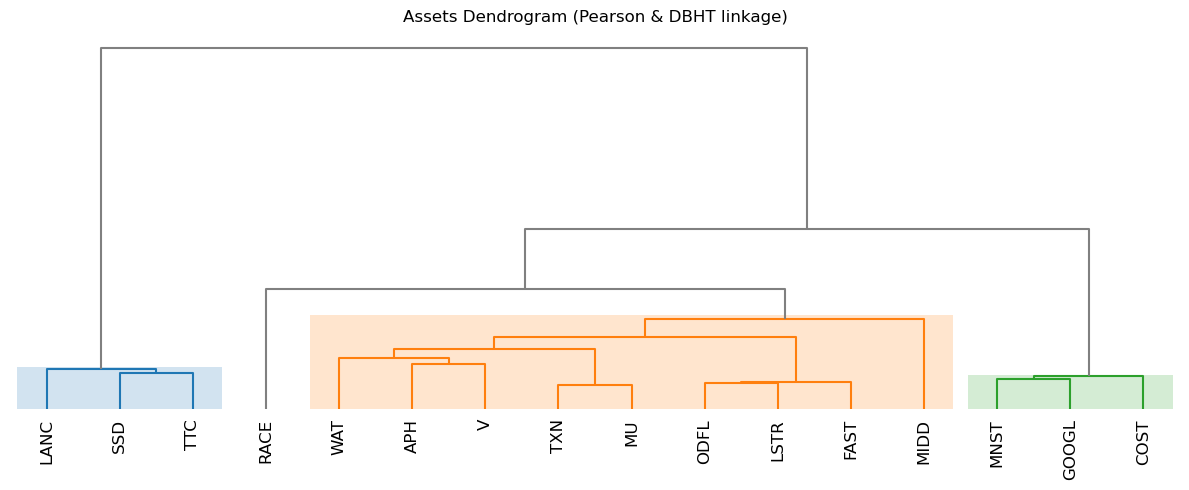

In [11]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y_before,
                        codependence='pearson',
                        linkage='DBHT',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [5]:
# Calculate the equal percentage allocation
allocation = 1 / len(assets)  # Fractional allocation
# Create DataFrame
df_equal_weights = pd.DataFrame({
    'Asset': assets,
    'Allocation': [allocation] * len(assets)  # Equal allocation for each asset
})

# Convert to percentage format
#df['Allocation (%)'] = df['Allocation'] * 100
df_equal_weights.set_index('Asset')

,Allocation
Asset,
APH,5.8824%
COST,5.8824%
FAST,5.8824%
GOOGL,5.8824%
LANC,5.8824%
LSTR,5.8824%
MIDD,5.8824%
MNST,5.8824%
MU,5.8824%


### Highly concentrated and unstable solutions

In [13]:
port = rp.Portfolio(returns=Y_before)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

mu = port.mu
cov = port.cov

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
port2 = rp.Portfolio(returns=Y_after)
port2.assets_stats(method_mu=method_mu, method_cov=method_cov)
w2 = port2.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)


In [16]:
df_equal_weights = w1.copy()
df_equal_weights['weights'] = 1/16
df_equal_weights

,weights
APH,6.2500%
COST,6.2500%
FAST,6.2500%
GOOGL,6.2500%
LANC,6.2500%
LSTR,6.2500%
MIDD,6.2500%
MNST,6.2500%
MU,6.2500%
ODFL,6.2500%


In [99]:
w1

,weights
APH,0.0000%
COST,13.1055%
FAST,0.0000%
GOOGL,0.0000%
LANC,0.9735%
LSTR,0.0000%
MIDD,0.0000%
MNST,0.0000%
MU,2.5424%
ODFL,14.3231%


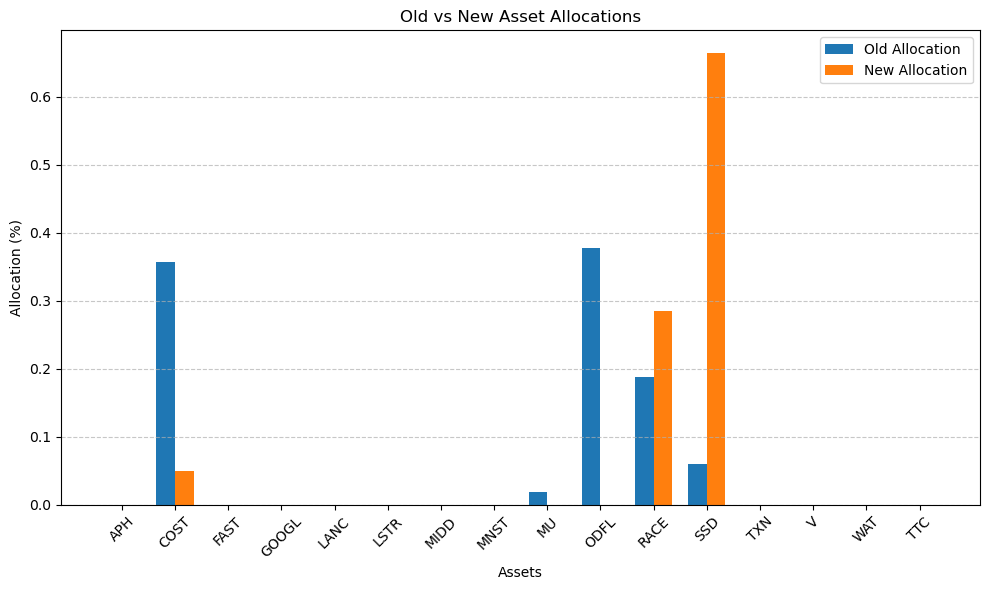

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data
assets = ['APH', 'COST', 'FAST', 'GOOGL', 'LANC', 'LSTR', 'MIDD', 'MNST',
          'MU', 'ODFL', 'RACE', 'SSD', 'TXN', 'V', 'WAT', 'TTC']

# Old and new allocations
old_allocations = w1['weights']
new_allocations = w2['weights']

# Create DataFrame
df = pd.DataFrame({
    'Asset': assets,
    'Old Allocation': old_allocations,
    'New Allocation': new_allocations
})
# Set up bar width and positions
bar_width = 0.35  # Width of the bars
indices = np.arange(len(df))  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot old and new allocations
bars1 = ax.bar(indices - bar_width/2, df['Old Allocation'], width=bar_width, label='Old Allocation',align='center')
bars2 = ax.bar(indices + bar_width/2, df['New Allocation'], width=bar_width, label='New Allocation')

# Labels and Titles
ax.set_xlabel('Assets')
ax.set_ylabel('Allocation (%)')
ax.set_title('Old vs New Asset Allocations')
ax.set_xticks(indices)
ax.set_xticklabels(df['Asset'], rotation=45)
ax.legend()

# Grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In either mean-variance portfolio, the risk contribution of each individual asset is not necessarily proportional to its weight within the portfolio. In the first one, Texas Instruments (TXN) is a sizable percentage of it, but it contributes essentially nothing to the downside risk. An equal-weight portfolio spreads out the risk contribution slightly better, but it is still not exactly even. The evenness indicates that we did a good job selecting a diversified set of stocks. Regular rebalancing is necessary to keep the weights even, but why not just buy index funds instead? 

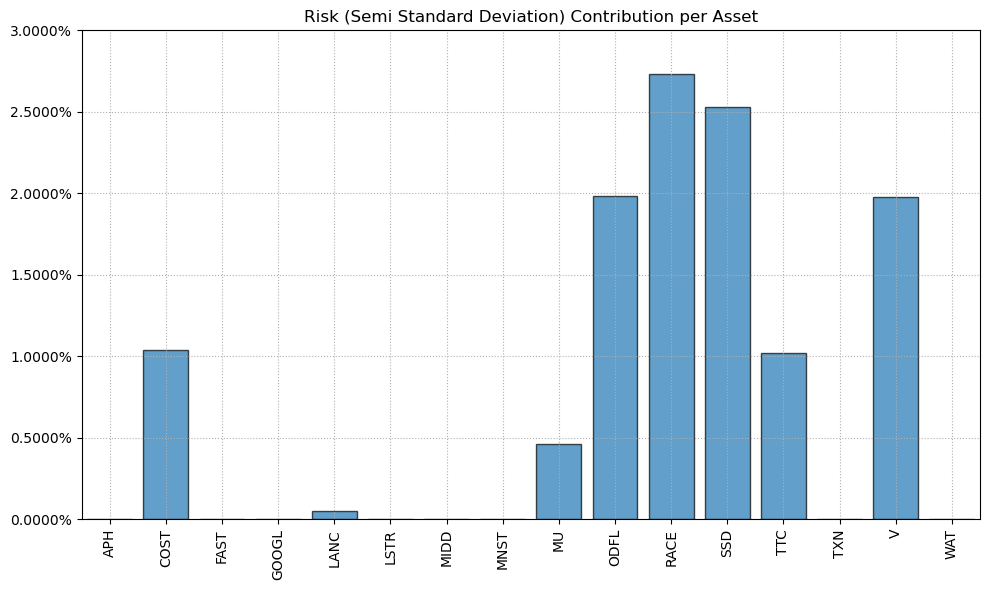

In [122]:
ax = rp.plot_risk_con(w=w1,
                      cov=cov,
                      returns=Y_before,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [9]:
ax = rp.plot_risk_con(w=w2,
                      cov=cov,
                      returns=Y_after,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

NameError: name 'w2' is not defined

Looking at the risk contributions of each asset in the mean-variance portfolio, we see we that about half our fortune is tied to Costco (COST), and most of the rest is on Old Dominion Freight Lines (ODFL). These are fairly stable companies, but I wouldn't be surprised if their returns were correlated given that everything you buy at any store was once on a truck. 
As you can see below, equal capital weight does not necessarily lead to equal risk weight, but this risk distribution looks a little more sane

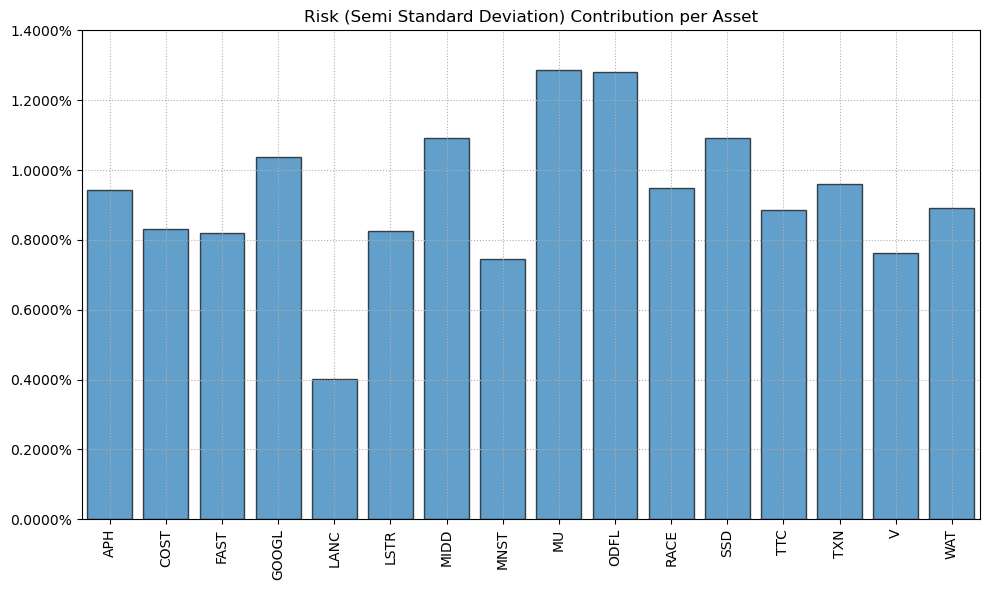

In [29]:
ax = rp.plot_risk_con(w=df_equal_weights,
                      cov=cov,
                      returns=Y_after,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### Poor out-of-sample performance and prognostic power
When we avoid look-ahead bias, use historical values to estimate mean and variance, and then see how the resultant portfolio performs on unseen data, the results are underwhelming. As predicted, we see the downside risk take its toll. The maximum drawdown (the largest distance to a "valley" from the previous "peak") is unacceptable even for me. The equal weight portfolio is less volatile because it is diversified, but correlations in price movements still create a large amount of tail risk.

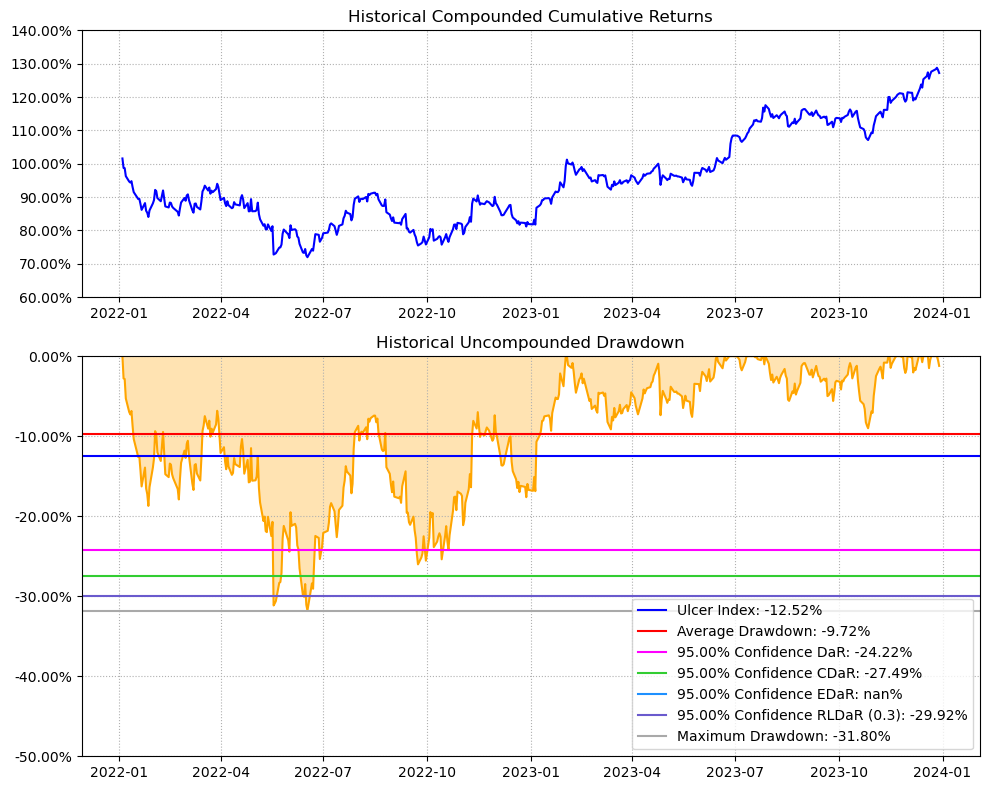

In [27]:
ax = rp.plot_drawdown(returns=Y_after,
                      w=w1,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

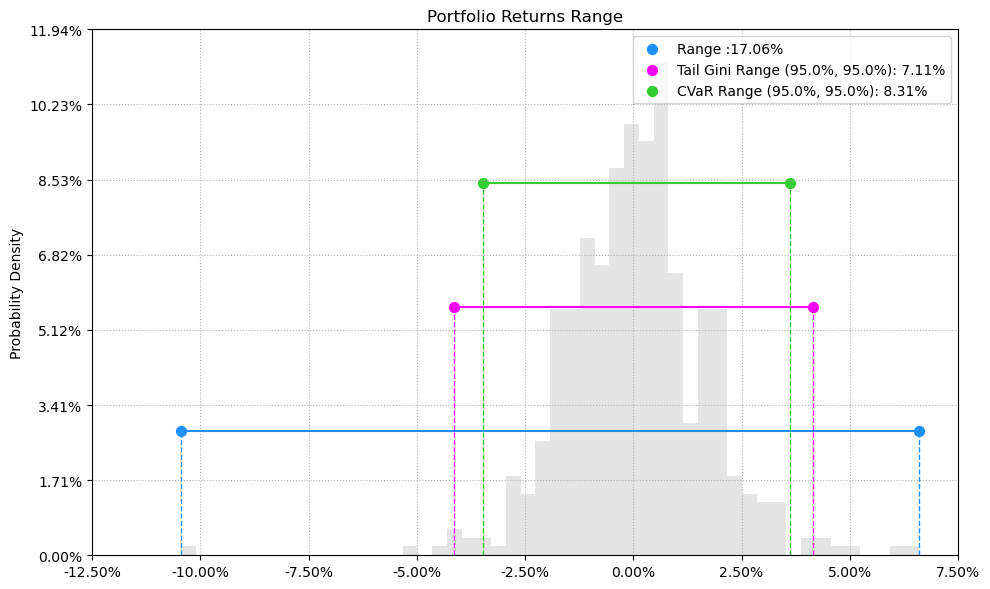

In [15]:
ax = rp.plot_range(returns=Y_after, w=w1 , alpha=0.05, a_sim=100, beta=None,
                    b_sim=None, bins=50, height=6, width=10, ax=None)

In [2]:
df_equal_weights = w1.copy()
df_equal_weights['weights'] = 1/16
# rp.plot_drawdown(returns=Y_after,
#                       w=df_equal_weights,
#                       alpha=0.05,
#                       height=8,
#                       width=10,
#                       ax=None)


NameError: name 'w' is not defined

## 2. Comparing Linkage Methods using Dendrograms and Two Difference Gap Statistic for Optimal Number of Clusters
We will see about organizing these stocks that tend to move together into different clusters that we can use to manage downside risk and not put all our eggs (money) into one basket (cluster).

[]

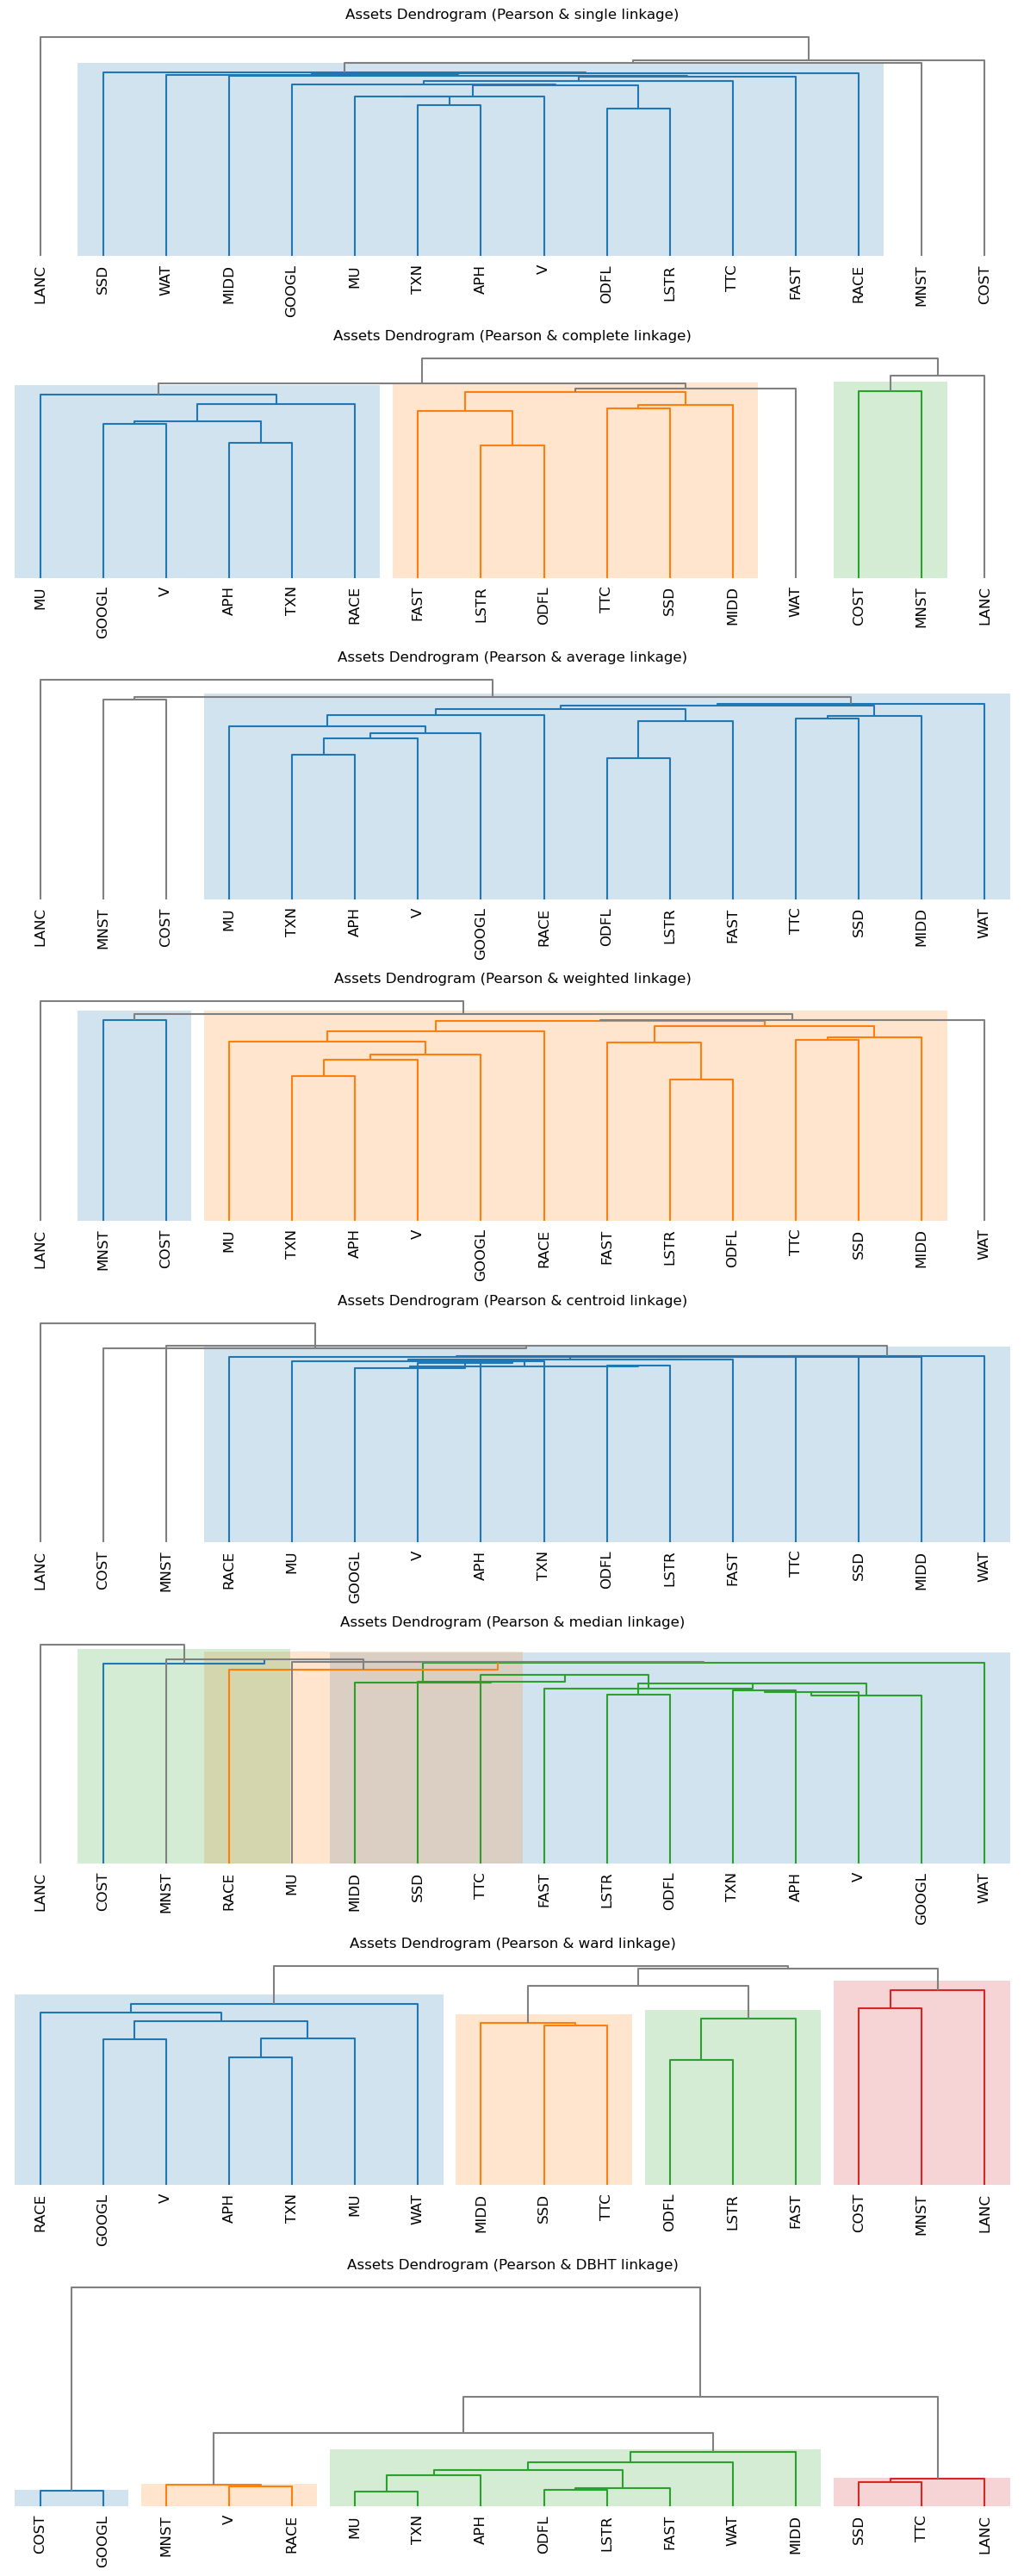

In [6]:
import matplotlib.pyplot as plt
import riskfolio as rp

# Comparison of several linkages methods

linkages = ['single','complete','average','weighted',
            'centroid', 'median', 'ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,

                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

In the charts above we can see that DBHT and Ward linkage build better hierarchical structures. These pass the eyeball test, but what metrics are there that quantify how well a clustering algorithm works? Two examples that will work fine in this instance are:
- Standardized silhouette index (A measure of how tall and wide a shadow our clusters would collectively cast if they were buildings, for example. After all, we want to link "similar" stocks into clusters sooner rather than later).
                                                                                                                                    -
- Two-difference gap statistic: the default in Riskfolio: Compare how well this set of clusters works with a control/reference distribution (a graph with no obvious clustering). This is how Riskfolio determines the number of clusters: it will stop when adding one more cluster yields no significant difference.                                                                                                            <br> 
These metrics were meant for "flat" clustering, in which no clusters overlap. There are some that are more apt for hierarchical clustering, but I would have to implement them myself. The TLAR method (That looks about right, also known as the "eyeball test") will work well enough for our purposes.
                                                                                                                                
                                                                                                                                    

[]

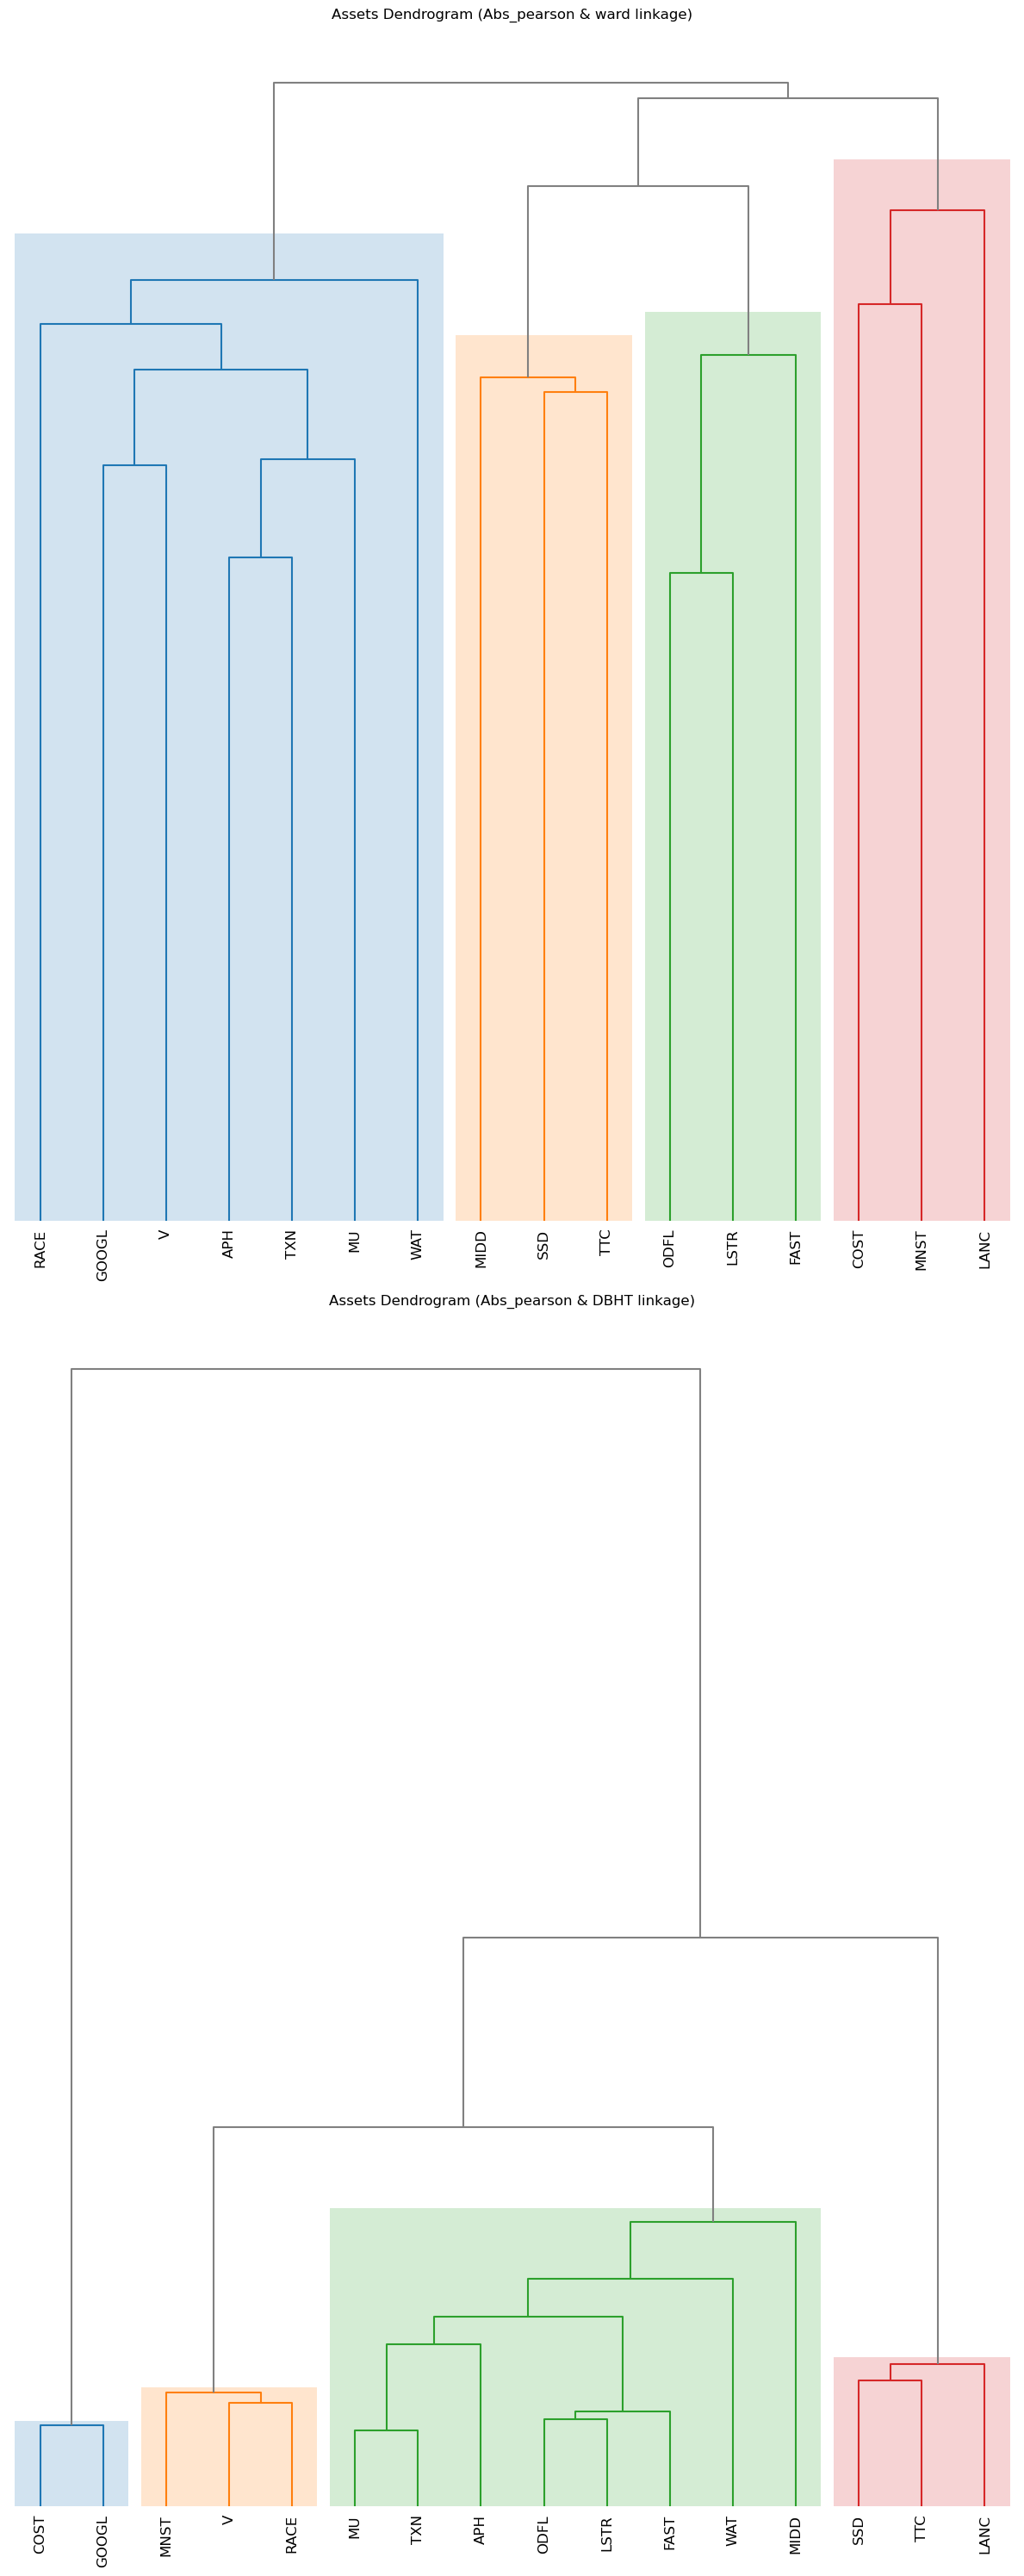

In [17]:
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='abs_pearson',
                               linkage=i,
                               #opt_k_method="stdsil",
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

When we juxtapose the dendrogram with the codependence matrix, we can see that the algorithm wants to make clusters where there are patches of pale green or yellow. Conversely, the boundaries between two clusters tend to be rows and columns of dark green. If there were any blue patches (indicating an inverse relationship), then the clustering algorithm would be inclined to put those stocks in different clusters. 
Clustering methods can be either "top-down", in which the set of assets is split in two repeatedly, or "bottom-up", in which each asset its its own cluster and then clusters are successively merged until they are all somehow linked. In the matrix below, we see that the codependence of each asset with itself is 1, which is maximal under this metric, a solid base case for either approach.

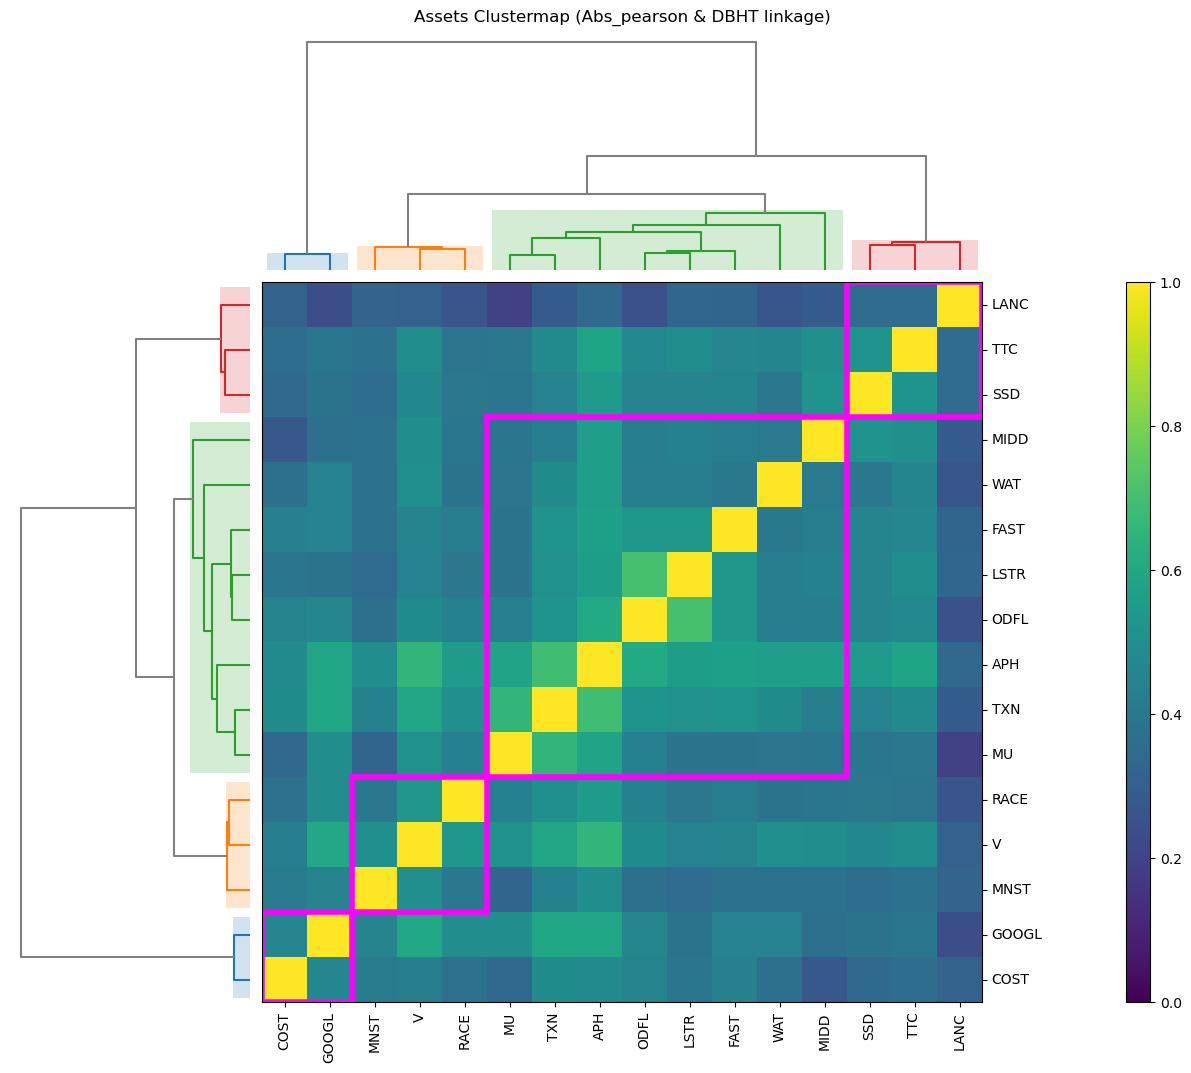

In [18]:
ax = rp.plot_clusters(returns=Y,
                      codependence='abs_pearson',
                      linkage='DBHT',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)


## 4. The problem in graph terms (the other kind of graph) .

Another way to visualize this problem is as a network or graph problem. This is a computer scientist's definition of "graph", with vertices (also called nodes, but really just dots or points) and edges (lines) connecting them.  One closely related problem from graph theory is the maximally filtered planar graph (MFPG).  A planar graph, in the parlance of graph theory, is one that can be drawn in two dimensions without any lines crossing. "Maximally filtered" means keeping only the vertices that preserve the most distance. The DBHT linkage method finds a "good enough" solution to the MFPG problem more efficiently by computing a Triangulated Maximally Filtered Graph.
How do we know when we can no longer draw such a graph? One key result from graph theory, Kuratowski's theorem, says that any such graph cannot contain 5 or more vertices all connected, or two groups A and B of three vertices where each element of A is connected to each element in B, and no connections exist between any two vertices in the same group. These special graphs are called "the complete graph on five vertices" and "the complete bipartite graph on six vertices". For concreteness, here is what they look like. 
<br>![K5](https://upload.wikimedia.org/wikipedia/commons/2/2d/4-simplex_graph.svg)
<br> ![K33](https://upload.wikimedia.org/wikipedia/commons/4/4e/Graph_K3-3.svg)
<br>Try if you must, but you will not be able to move vertices or edges around to make either one planar. 

[]

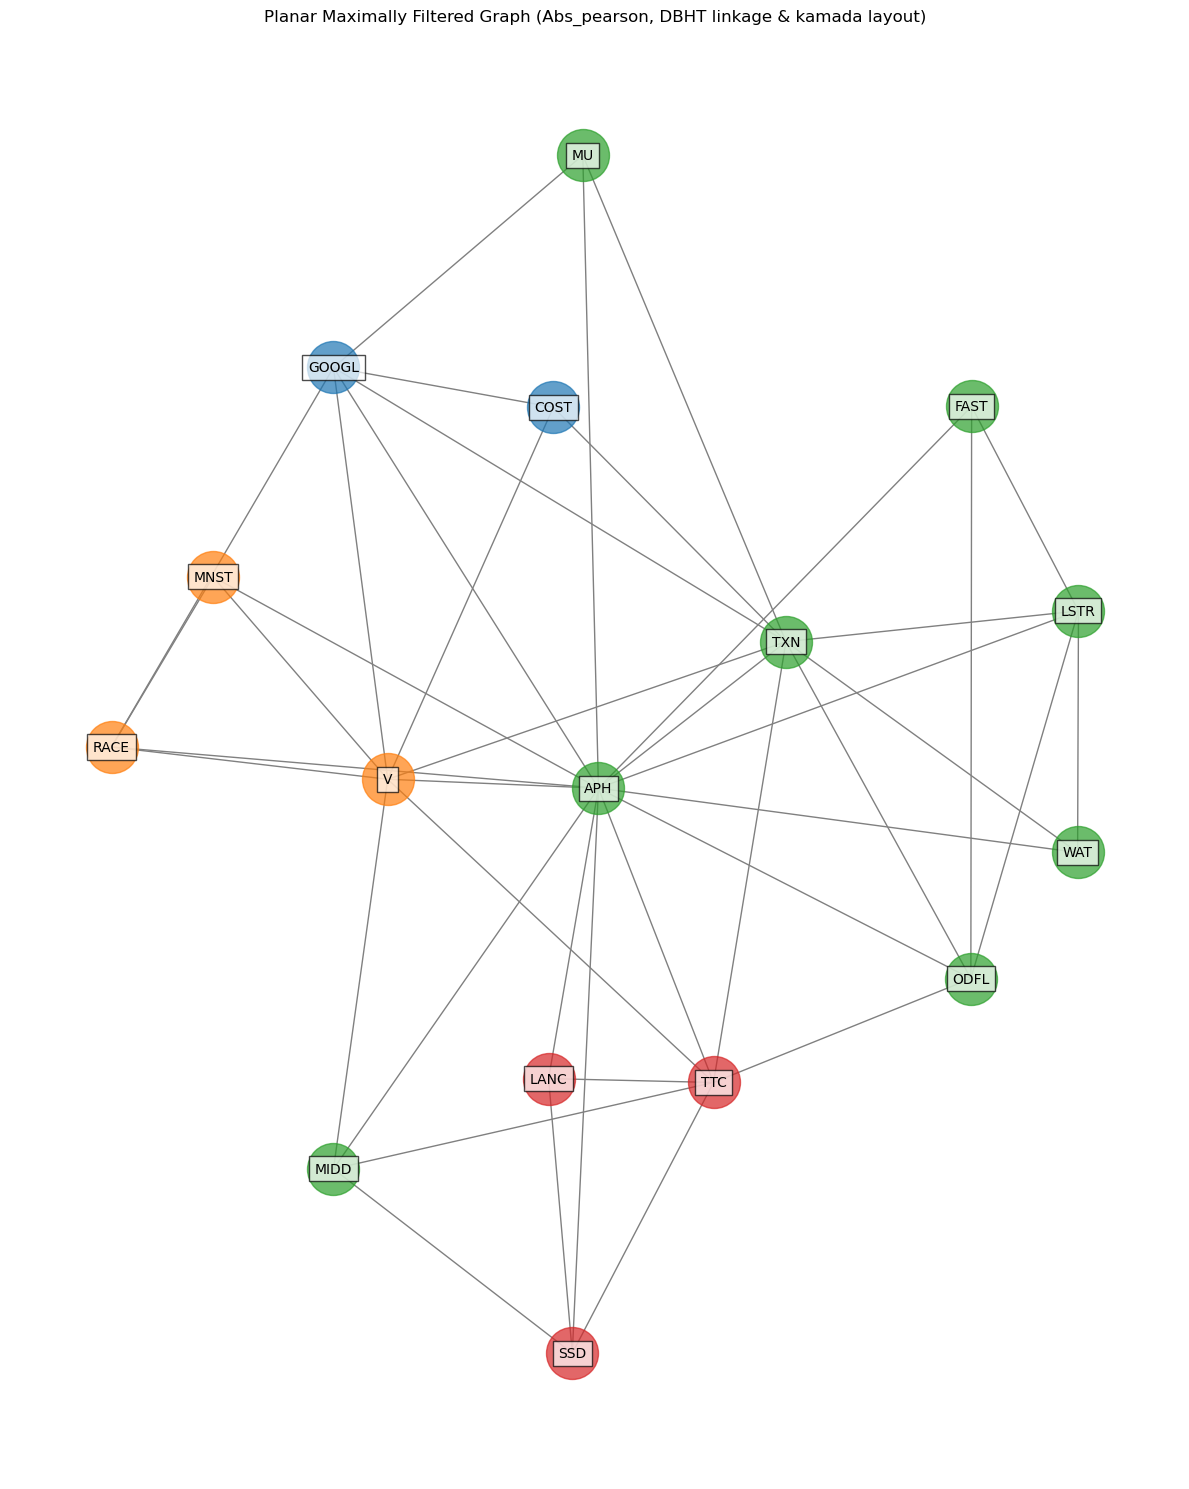

In [14]:
# Comparison of two Network Graphs

linkages = ['DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="abs_pearson",
                            linkage=i,
                            #opt_k_method="twodiff",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='kamada',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

The first graph shows the minimum spanning tree (MST) of our network of stocks. A "tree" is a graph that can be defined in the following ways, which can be proven to be logically equivalent. 
- A graph with n vertices and n-1 edges
- A graph in which there is a unique path from every vertex to every other vertex.
- A graph in which there are no cycles (no paths from any vertex back to itself). 

While these can easily be drawn as planar graphs, this does not quite give us what we want in terms of the initial task of clustering. This gives us only enough edges to make a tree out of the following graph while minimizing the total distance measure over the edges we pick. The MFPG wants to pick the ones that maximize distance, but the sparsity, and the preference for small clusters, is built into the constraint that the graph must be planar. 

You may have noticed that the second graph has many edges that cross. This is a problem inherent in projecting a high-dimensional space into 2D-- some information will be lost. 
Riskfolio was kind enough to provide a way to visualize our network as a planar graph, but you will notice that it does not preserve distances all too well. 
APH, which was at the center of the biggest cluster in the previous graph, is not close to anything in the planar drawing, but that's what it took to keep all the edges within our biggest cluster from crossing.
It's also no coincidence that each of these graphs, except the MST, contains lots of triangles or '3-cliques': it's because a triangle is definitely planar. We can connect any of these 3-cliques to at most two others, and so on down the line, but we can't connect a third because then our graph will contain K3,3. So one quick way to compute the MFPG is "MST, then groups of three". 

## 5. Comparing Network Layouts 

Sometimes it is better to plot a network using a specific layout. Changing the network layout could help us to visualize better the relationship among assets and to identify a better clustering method. Riskfolio-Lib offers four network layouts.

[]

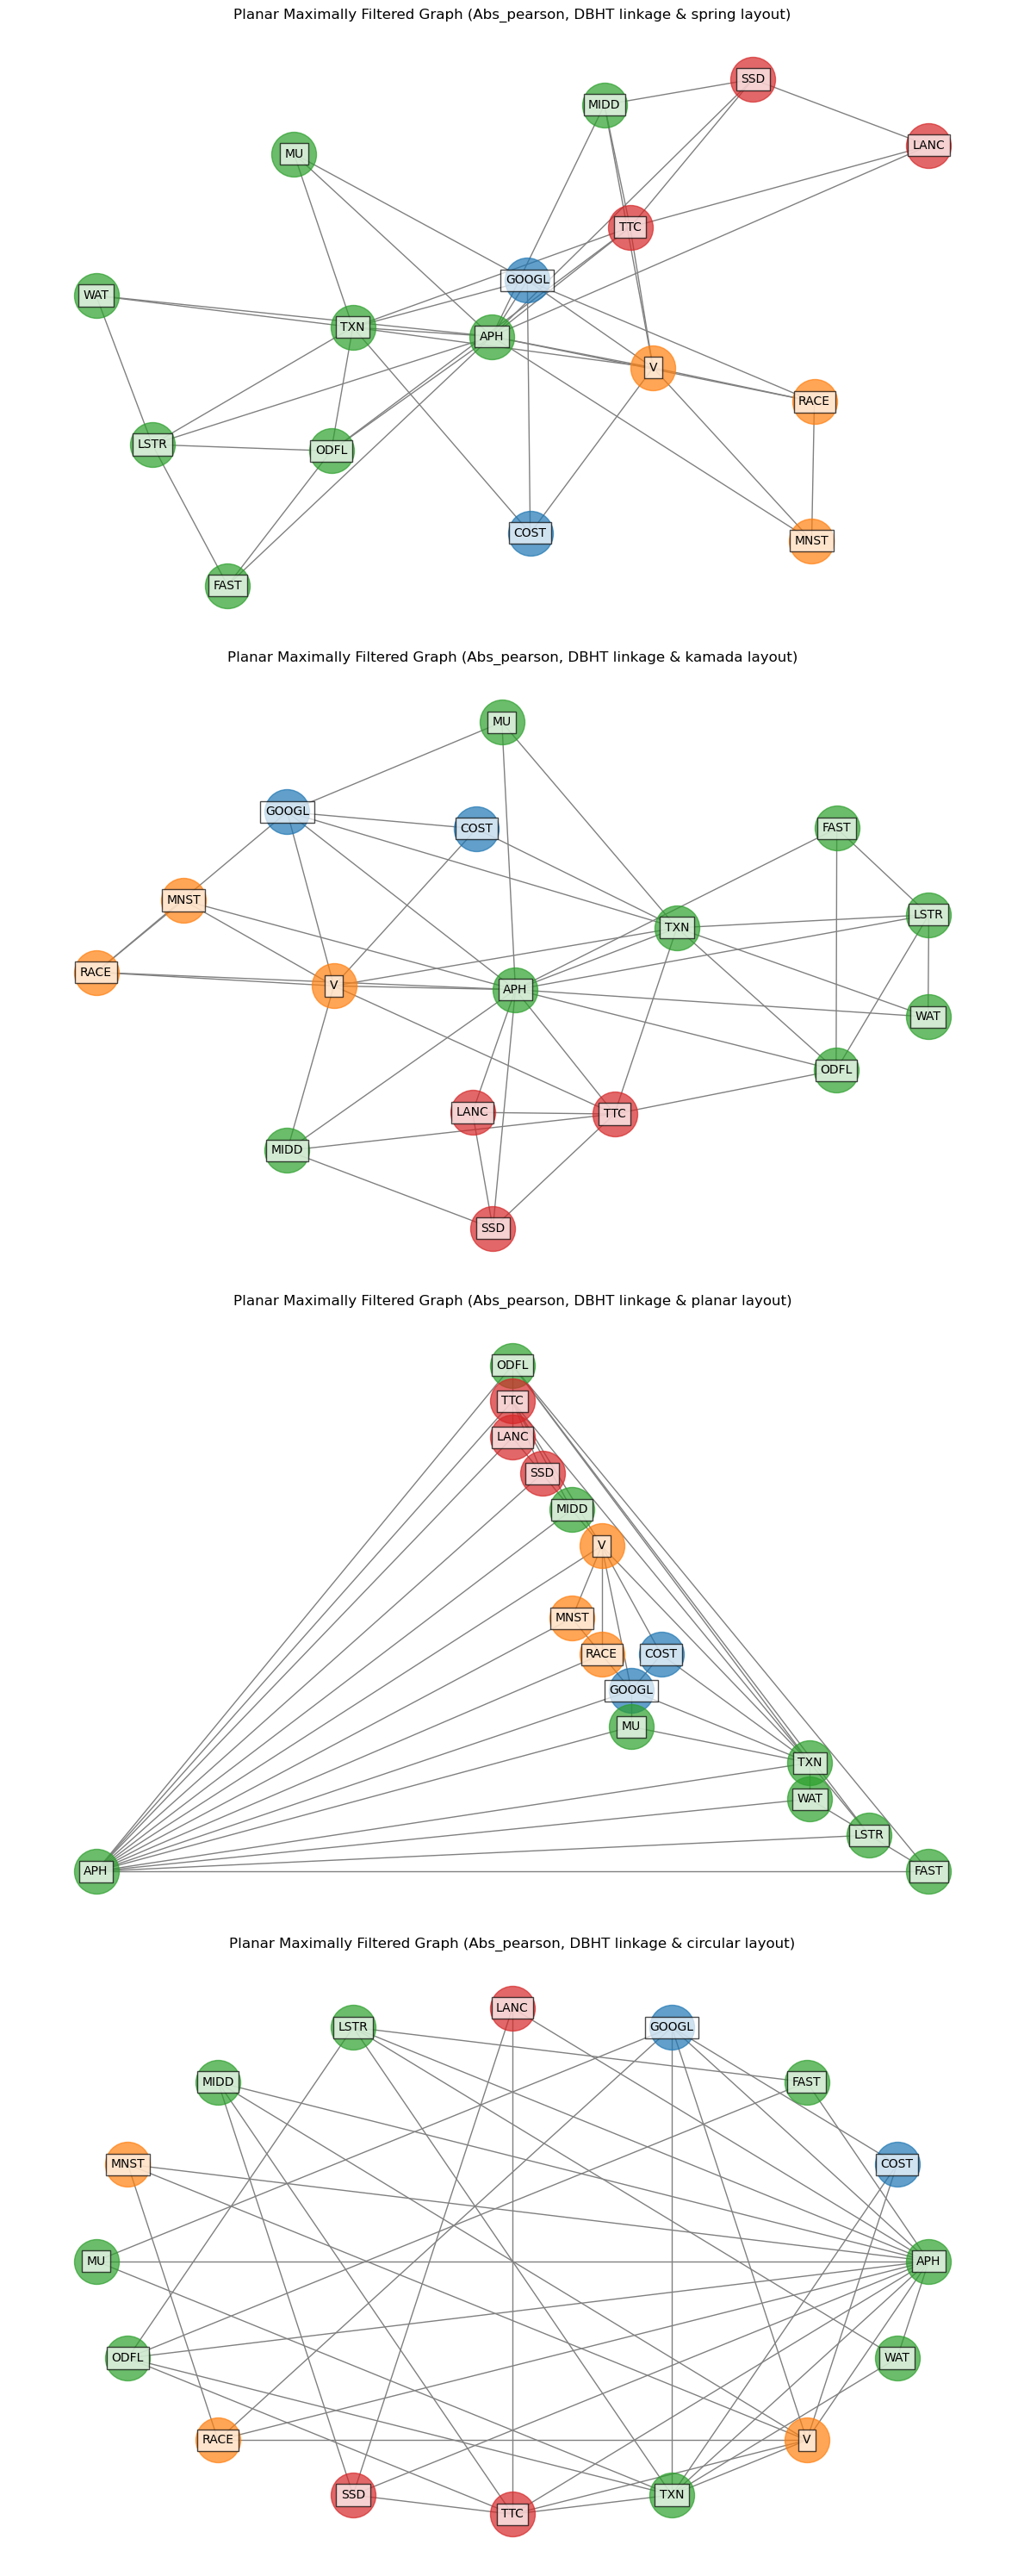

In [9]:
# Comparison of several network layouts

kinds =['spring','kamada','planar','circular']

fig, ax = plt.subplots(len(kinds), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in kinds:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="abs_pearson",
                            linkage="DBHT",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind=i,
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

## 6. Clusters Components

In [15]:
# Getting components of each cluster

clusters = rp.assets_clusters(returns=Y,
                              codependence='abs_pearson',
                              linkage='DBHT',
                              k=None,
                              max_k=10,
                              leaf_order=True)

display(clusters.sort_values(by='Clusters'))

,Assets,Clusters
1,COST,Cluster 1
3,GOOGL,Cluster 1
7,MNST,Cluster 2
10,RACE,Cluster 2
14,V,Cluster 2
0,APH,Cluster 3
2,FAST,Cluster 3
5,LSTR,Cluster 3
6,MIDD,Cluster 3
8,MU,Cluster 3


## How does this respond to outliers?
We were seeking stability, but sometimes stocks will drop out of my target portfolio (If they no longer meet my screening criteria), and sometimes I will want to give an allocation to some new stock that has shown up in my screener.
<br> I will now add two stocks that are qualitatively unlike any other in my original portfolio: WWE (yes, the wrestling people: they are a publicly traded company),   and Tesla. Quantitatively, I do not expect Tesla to correlate well with the broader market or macroeconomic trends either, as some big price moves during this time period are directly attributable to something Elon did that particular day. 

In [13]:
assets = ['APH', 'COST', 'FAST', 'GOOGL', 'LANC', 'LSTR', 'MIDD', 'MNST',
          'MU', 'ODFL', 'RACE', 'SSD', 'TXN', 'V', 'WAT', 'TTC', 'TKO', 'TSLA'
         ]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  18 of 18 completed


In [14]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APH,COST,FAST,GOOGL,LANC,LSTR,MIDD,MNST,MU,ODFL,RACE,SSD,TKO,TSLA,TTC,TXN,V,WAT
Date,,,,,,,,,,,,,,,,,,
2016-01-05,-1.1205%,0.2444%,-1.0948%,0.2752%,2.7908%,-0.4950%,1.4763%,1.1986%,3.4194%,0.8730%,2.3212%,1.4519%,-2.1579%,0.0090%,0.5534%,-1.0490%,0.7530%,-0.4143%
2016-01-06,-2.3658%,-0.9254%,0.2767%,-0.2889%,-0.2585%,-1.1836%,-5.7172%,0.1575%,-4.0486%,-2.3927%,-2.9284%,-0.7454%,-3.2501%,-1.9648%,-1.6923%,-0.6509%,-1.3111%,-0.0770%
2016-01-07,-3.6042%,-2.2909%,-2.0321%,-2.4140%,0.4061%,-1.5969%,-5.1302%,-0.7519%,-3.9381%,-3.8421%,-0.8923%,-2.5233%,-2.0996%,-1.5477%,-2.3513%,-3.2198%,-1.9662%,-0.6861%
2016-01-08,-1.4998%,-1.7505%,-0.6403%,-1.3617%,-1.8935%,0.1764%,-2.2169%,-0.6543%,-2.4158%,-0.7413%,-7.5884%,-0.9861%,-0.1225%,-2.1563%,-1.9206%,-2.5919%,-1.2332%,-1.6302%
2016-01-11,-0.7720%,1.7159%,0.2320%,0.2955%,0.0088%,0.1408%,-2.8393%,1.2409%,-6.0015%,-0.7286%,0.6263%,0.3112%,0.7975%,-1.4929%,1.1691%,1.6879%,1.4270%,-0.5051%


As you will see below, Ward and DBHT performed best on our initial portfolio, but the addition of these new stocks has led to a very different clustering. Comparing the two clusterings by directly by either optimality measure mentioned above is comparing apples and oranges, since there are two more vertices, but I see good news and bad news in the new graph. The good news is that Tesla ended up in the same cluster as Ferrari (RACE), but the bad news is that Costco (COST) was displaced from its cluster and ended up in a cluster all its own. Exactly how this affects our allocations depends on the formulation of the portfolio optimization problem, as we will see in Part 2.  

[]

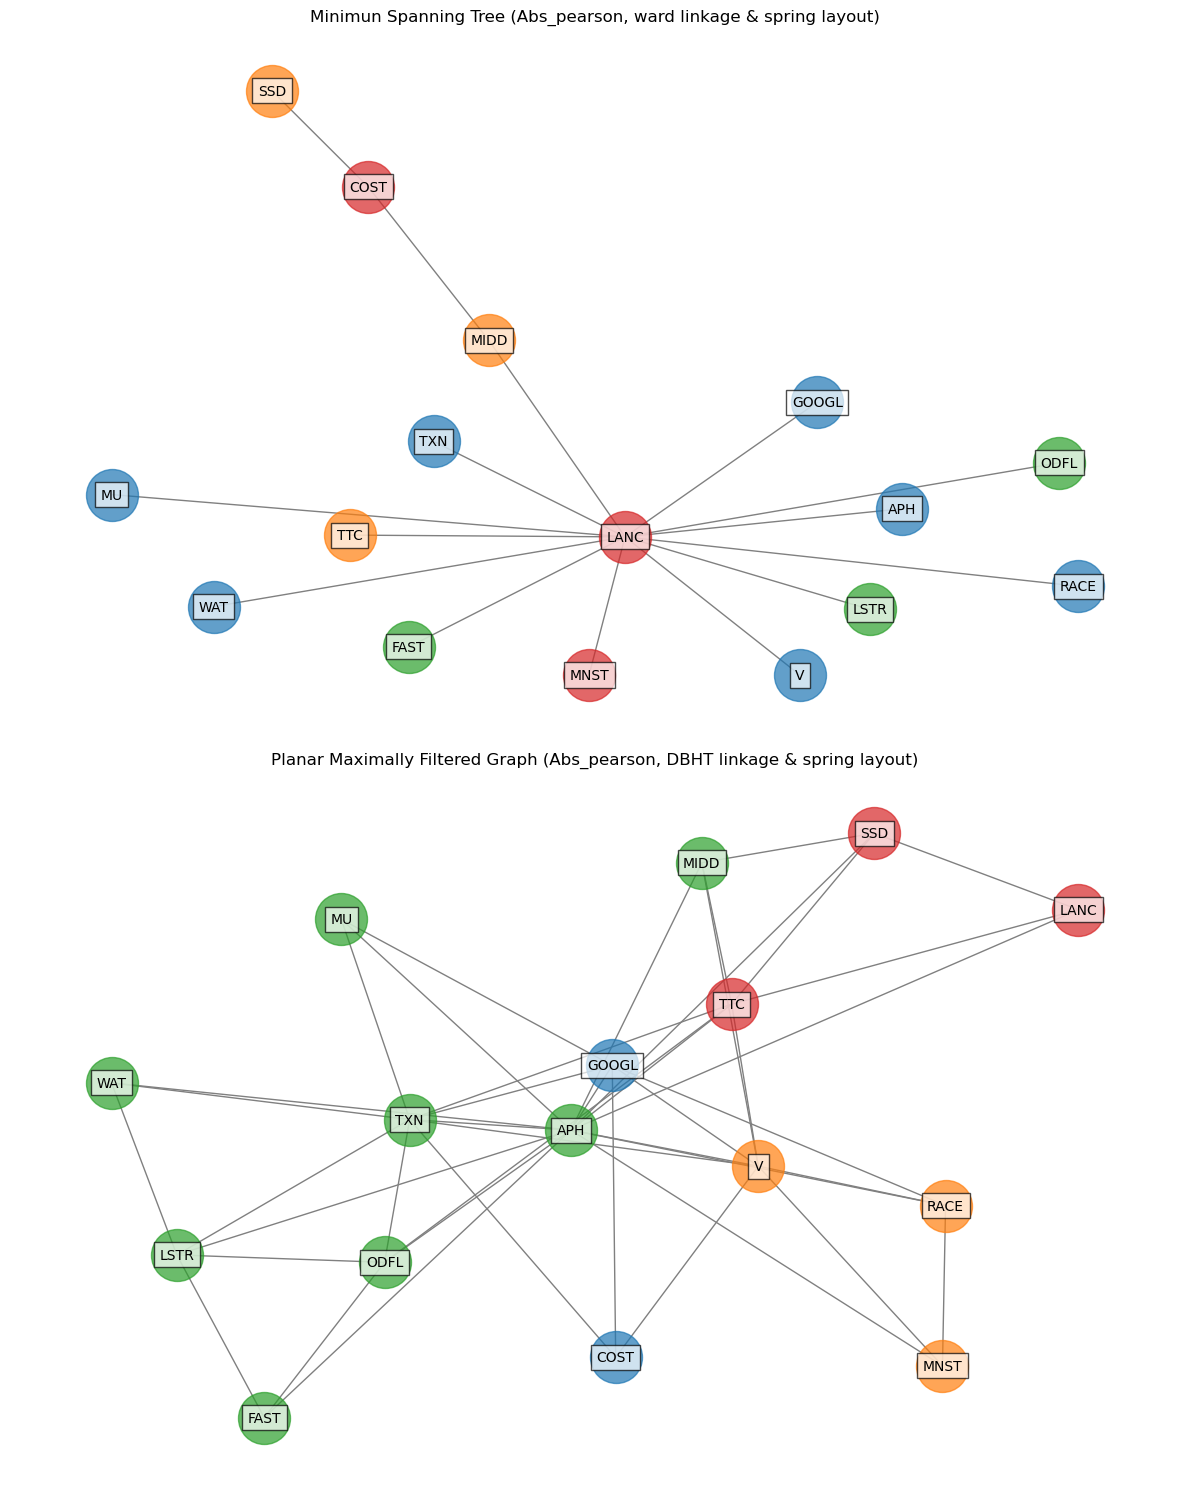

In [16]:
import matplotlib.pyplot as plt
linkages = ['ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="abs_pearson",
                            linkage=i,
                            #opt_k_method="twodiff",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='spring',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

In [16]:
new_clusters = rp.assets_clusters(returns=Y,
                              codependence='pearson',
                              linkage='DBHT',
                              k=None,
                              max_k=10,
                              leaf_order=True)

display(new_clusters.sort_values(by='Clusters'))

,Assets,Clusters
14,TTC,Cluster 1
11,SSD,Cluster 1
4,LANC,Cluster 1
0,APH,Cluster 2
13,TSLA,Cluster 2
10,RACE,Cluster 2
9,ODFL,Cluster 2
8,MU,Cluster 2
6,MIDD,Cluster 2
5,LSTR,Cluster 2


In [19]:
 import pandas as pd

# Example data
#

# Merge on 'Assets'
merged = clusters.merge(new_clusters, on="Assets", suffixes=('_old', '_new'))

# Find differences
differences = merged[merged['Clusters_old'] != merged['Clusters_new']]

# Count differences
num_differences = len(differences)

print(f"Number of assets with different clusters: {num_differences}")


Number of assets with different clusters: 13


In [20]:
merged

,Assets,Clusters_old,Clusters_new
0,APH,Cluster 3,Cluster 2
1,COST,Cluster 1,Cluster 4
2,FAST,Cluster 3,Cluster 2
3,GOOGL,Cluster 1,Cluster 3
4,LANC,Cluster 4,Cluster 1
5,LSTR,Cluster 3,Cluster 2
6,MIDD,Cluster 3,Cluster 2
7,MNST,Cluster 2,Cluster 2
8,MU,Cluster 3,Cluster 2
9,ODFL,Cluster 3,Cluster 2


In [22]:
merged.sort_values('Clusters_old')

,Assets,Clusters_old,Clusters_new
1,COST,Cluster 1,Cluster 4
3,GOOGL,Cluster 1,Cluster 3
7,MNST,Cluster 2,Cluster 2
10,RACE,Cluster 2,Cluster 2
14,V,Cluster 2,Cluster 3
0,APH,Cluster 3,Cluster 2
2,FAST,Cluster 3,Cluster 2
5,LSTR,Cluster 3,Cluster 2
6,MIDD,Cluster 3,Cluster 2
8,MU,Cluster 3,Cluster 2


In [19]:
from collections import defaultdict

# Create dictionaries of assets grouped by clusters
old_groups = clusters.groupby('Clusters')['Assets'].apply(set).to_dict()
new_groups = new_clusters.groupby('Clusters')['Assets'].apply(set).to_dict()

print("Old Groups:", old_groups)
print("New Groups:", new_groups)


Old Groups: {'Cluster 1': {'GOOGL', 'COST'}, 'Cluster 2': {'RACE', 'MNST', 'V'}, 'Cluster 3': {'MU', 'LSTR', 'ODFL', 'MIDD', 'WAT', 'FAST', 'APH', 'TXN'}, 'Cluster 4': {'TTC', 'SSD', 'LANC'}}
New Groups: {'Cluster 1': {'TTC', 'SSD', 'LANC'}, 'Cluster 2': {'MU', 'MNST', 'LSTR', 'ODFL', 'MIDD', 'RACE', 'WAT', 'TSLA', 'FAST', 'APH'}, 'Cluster 3': {'TKO', 'GOOGL', 'V', 'TXN'}, 'Cluster 4': {'COST'}}
